**Factors in the Development of Heart Disease**

Riley McNair, Lucas Wong, Yusen Wu, Kevin Zhu

**Introduction**

Heart disease is one of North America's leading causes of death in adults. Heart disease can lead to increased risks of heart failure and attacks and sometimes death. The likelihood of getting heart disease is increased by a number of factors, which we are going to explore within this report.  </br></br>

**Question**: Which of the following factors, cholesterol, resting blood pressure, max heart rate, and age, is a significant indicator of heart disease in each gender? Each of these variables has been linked to heart disease in people. The CDC states that high cholesterol levels and blood pressure are linked to the cause of heart disease (CDC 2022). Exercise and age also play a vital role in the development of heart disease within individuals (Rodgers et al. 2019). 

Load required packages:

In [5]:
# load packages
library(tidyverse) # needed for many functions used for data analysis, such as read_csv(), select(), etc.
library(repr)
library(infer) #needed for bootstraping and editing the data and plots

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Read in the data from UC Irvine's Machine Learning Repository: https://archive.ics.uci.edu/dataset/45/heart+disease via a zip file:

In [6]:
# read in dataset from web
url <- "https://archive.ics.uci.edu/static/public/45/heart+disease.zip"
download.file(url, "cleveland_data.zip")
unzip("cleveland_data.zip")
cleveland_original <- read_csv("processed.cleveland.data",
                               col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs",
                                        "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"),
                               show_col_types = FALSE)

# preview first 5 rows of the dataframe
head(cleveland_original, 5)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


Filter the categories we will be using. This includes age, sex, resting blood pressure, max heart rate, cholesteral levels, and the presence of heart disease. We have tidied the num category (which originally had other numerical values), which represents the presence of heart disease, 0 = no heart disease, 1 = heart disease present. 

In [7]:
# select for columns we'll use
cleveland <- select(cleveland_original, age, sex, trestbps, chol, thalach, num)

# convert num column to binary (0 = no heart disease; 1 = presence of heart disease)
cleveland <- cleveland |>
    mutate(num = as.factor(ifelse(num != 0, 1, 0)))

# preview first 5 rows of new dataframe
head(cleveland, 5)

age,sex,trestbps,chol,thalach,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,145,233,150,0
67,1,160,286,108,1
67,1,120,229,129,1
37,1,130,250,187,0
41,0,130,204,172,0


Visualizing preliminary relationships between data:

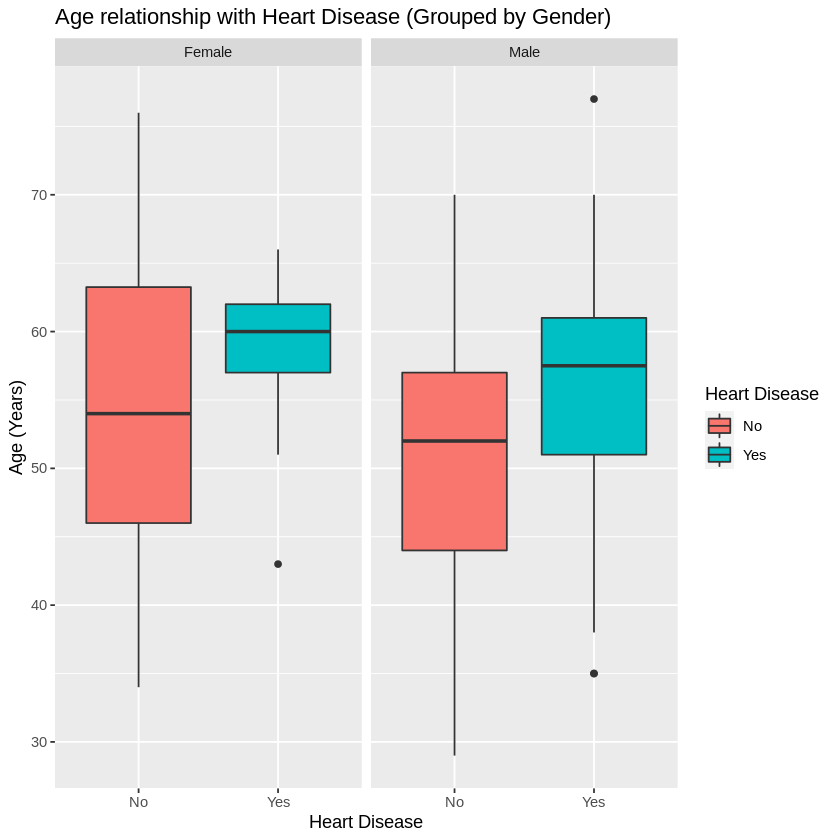

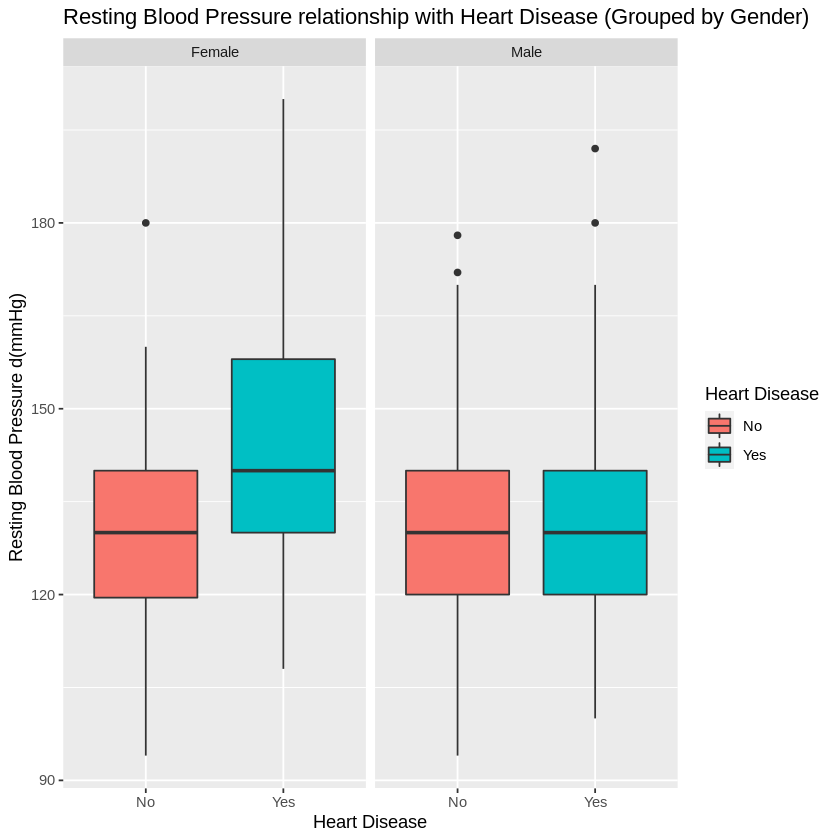

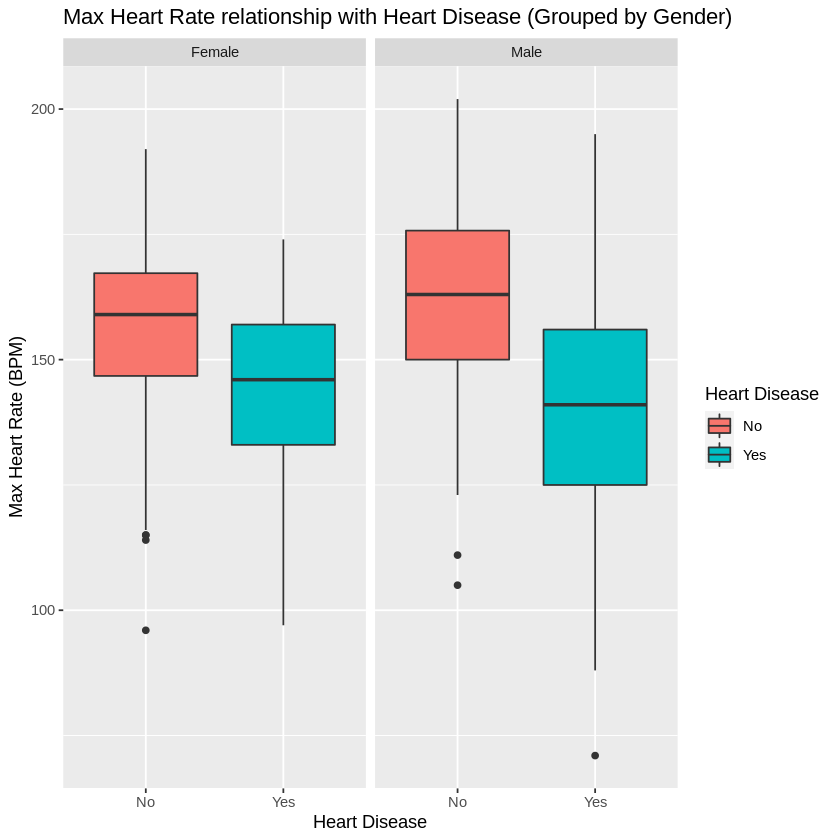

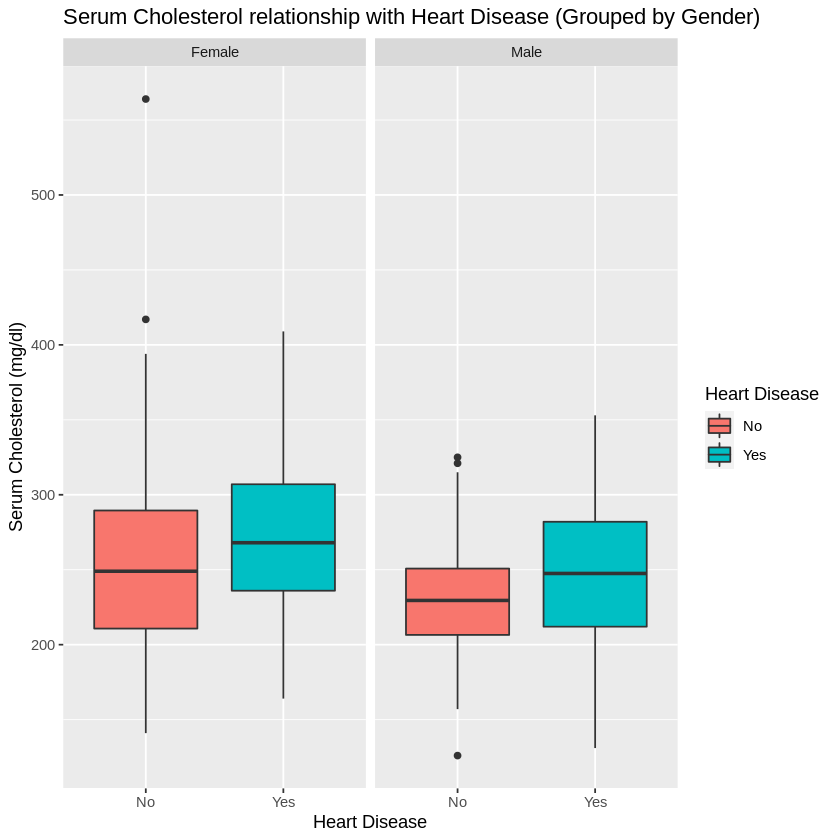

In [8]:
#Temporary dataframe to make labelling plots more convienient
labelled_data <- mutate(cleveland, sex = ifelse(sex == 1, "Male", "Female"), 
                                   num = ifelse(num == 1, "Yes", "No"))

#Age Vs heart disease plot
age_hd <- ggplot(labelled_data) + geom_boxplot(aes(x=num,y=age, fill = num)) + facet_wrap(~sex) +
            labs(fill = "Heart Disease", x = "Heart Disease", y = "Age (Years)") + 
            ggtitle("Age relationship with Heart Disease (Grouped by Gender)")

#Resting blood pressure vs heart disease plot
bp_hd <- ggplot(labelled_data) + geom_boxplot(aes(x=num,y=trestbps, fill = num)) + facet_wrap(~sex) +
            labs(fill = "Heart Disease", x = "Heart Disease", y = "Resting Blood Pressure d(mmHg)") + 
            ggtitle("Resting Blood Pressure relationship with Heart Disease (Grouped by Gender)")

#Max heart rate during exercise vs heart disease plot
maxhr_hd <- ggplot(labelled_data) + geom_boxplot(aes(x=num,y=thalach, fill = num)) + facet_wrap(~sex) +
            labs(fill = "Heart Disease", x = "Heart Disease", y = "Max Heart Rate (BPM)") + 
            ggtitle("Max Heart Rate relationship with Heart Disease (Grouped by Gender)")

#Serum cholesterol vs heart disease plot
chol_hd <- ggplot(labelled_data) + geom_boxplot(aes(x=num,y=chol, fill = num)) + facet_wrap(~sex) +
            labs(fill = "Heart Disease", x = "Heart Disease", y = "Serum Cholesterol (mg/dl)") + 
            ggtitle("Serum Cholesterol relationship with Heart Disease (Grouped by Gender)")

#Display plots
age_hd
bp_hd
maxhr_hd
chol_hd

**Methods**

We will first calculate the sample statistics from the data we have available, grouped by gender. Then, we will create a bootstrapping distribution with 2500 reps.

From this distribution and the sample statistics, we will construct 95% confidence intervals for each of the quantitative explanatory variables we have previously decided upon, in order to assess the feasibility of their respective estimate. Our research will use a 95% confidence interval since it is the most common interval range reported within the medical field (Phillips et al. 2021). 

Finally, we will conduct hypothesis tests for each of the explanatory variables.

The null hypothesis will be  𝐻0
 :  𝜇0=𝜇1
 
The alternative hypothesis will be  𝐻𝐴
 :  𝜇0≠𝜇1
 
where  𝜇0
  is the mean of the variable for non-heart disease patients, and  𝜇1
  is the mean of the variable for heart disease patients.

From these tests we will conclude at a 5% significance level, whether to accept or reject the null hypothesis that the mean for each explanatory variable is the same for both heart disease and non-heart disease patients.

We will also calculate the confidence intervals and conduct these same tests with a theory based approach, as the original sample has sufficient size for the CLT to hold (the sample is independent as the population of heart disease patients is much greater than 303 (our sample size), and we assume the data was sampled randomly). This is in order to compare with our bootstrapping values, and if there is significant difference this may imply that the sample is not randomly sampled or representative of the population.

## TODO:
Discuss why we chose max heart rate as the variable of choice

## TODO:
code for bootstrapping CI/Hypothesis tests for max heart rate (by gender):

## TODO:
code for CLT (theory) CI/Hypothesis tests for max heart rate (by gender):

## TODO: 
Discuss results from above code

**Findings**

Based on our research and results we have determined that max heart rate is a determining factor of heart disease in male and female, along with other variables. 



**Future Significance**

These findings could help those in the medical field better determine which characteristics could predict heart diseases, indicating specific characteristics that would increase their chances of contracting heart disease among individuals. Further research could be done surrounding which types of heart diseases are most commonly seen among people with certain variables such as age and cholesterol. Also, researchers could use different categorical variables to determine the risks of getting heart diseases, such as racial background, family history (patients' predisposition to heart diseases), or age categories.



## Reference:

Center for Disease Control and Prevention, Heart Disease and Stroke, National Center for Chronic Disease Prevention and Health Promotion, 2022 Sep 8. 

Phillips, M.R., Wykoff, C.C., Thabane, L. et al. The clinician’s guide to p values, confidence intervals, and magnitude of effects. Eye 36, 341–342 (2022). doi: /10.1038/s41433-021-01863-w

Rodgers JL, Jones J, Bolleddu SI, Vanthenapalli S, Rodgers LE, Shah K, Karia K, Panguluri SK. Cardiovascular Risks Associated with Gender and Aging. J Cardiovasc Dev Dis. 2019 Apr 27;6(2):19. doi: 10.3390/jcdd6020019. PMID: 31035613; PMCID: PMC6616540.

